In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data_df = pd.read_csv(mouse_drug_data_to_load)
clinical_data_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = clinical_data_df.merge(mouse_data_df, how="left", on="Mouse ID")

# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volume_data = combined_df.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']
tumor_volume_data = tumor_volume_data.reset_index()

# Convert to DataFrame
tumor_volume_data_df = pd.DataFrame(tumor_volume_data)

# Preview DataFrame
tumor_volume_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Preview DataFrame
tumor_volume_data_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [4]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumor_volume_data_sem = combined_df.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

tumor_volume_data_sem = tumor_volume_data_sem.reset_index()

# Convert to DataFrame
tumor_volume_data_sem_df = pd.DataFrame(tumor_volume_data_sem)

# Preview DataFrame
tumor_volume_data_sem_df

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [5]:
tumor_volume_data_sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [6]:
# Minor Data Munging to Re-Format the Data Frames

#Pivot the data frames
tumor_volume_data_df_pivot = tumor_volume_data_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')
tumor_volume_data_df_sem_pivot = tumor_volume_data_sem_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

tumor_volume_data_df_pivot.reset_index()
tumor_volume_data_df_sem_pivot.reset_index()

# Preview that Reformatting worked
tumor_volume_data_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [7]:
tumor_volume_data_df_sem_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


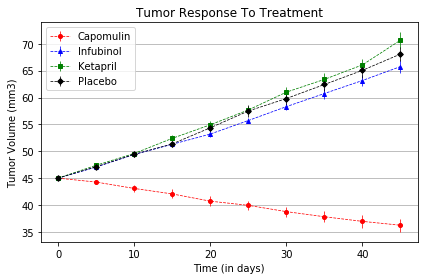

In [24]:
drugs_decors_dict = {
    #Drug name : [Color , marker]
    'Capomulin' : ['red', 'o'],
    'Infubinol' : ['blue', '^'],
    'Ketapril' : ['green', 's'],
    'Placebo' : ['black', 'D'],
}

# Generate the Plot (with Error Bars)
tumor_volume_data_df_pivot_filtered = tumor_volume_data_df_pivot.loc[:,['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
tumor_volume_data_sem_df_filtered = tumor_volume_data_df_sem_pivot.loc[:,['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

tumor_volume_data_df_pivot_filtered.reset_index()
tumor_volume_data_sem_df_filtered.reset_index()

#Iterate through the decors dictionary to draw the bars
for k, v in drugs_decors_dict.items():
    plt.errorbar(tumor_volume_data_df_pivot_filtered.index, 
                tumor_volume_data_df_pivot_filtered[k],
                yerr=tumor_volume_data_sem_df_filtered[k],
                label=k,
                color=v[0], 
                marker=v[1],
                linestyle="dashed",
                linewidth=0.75,
                ms=4
                )

#Set labels
plt.xlabel('Time (in days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Response To Treatment')
plt.legend(loc='best')
plt.grid(axis='y')
plt.tight_layout()

# Save the Figure
plt.savefig("analysis/1_tumor_response.png")

#Show the figure
plt.show()

## Metastatic Response to Treatment

In [9]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_site_df = combined_df.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
meta_site_df = meta_site_df.reset_index()

# Preview DataFrame
meta_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [10]:
meta_site_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
meta_site_sem_df = combined_df.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
meta_site_sem_df = meta_site_sem_df.reset_index()

# Preview DataFrame
meta_site_sem_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [12]:
meta_site_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [13]:
# Minor Data Munging to Re-Format the Data Frames

#Flatten the data frame
meta_site_df.reset_index()
meta_site_sem_df.reset_index()

meta_site_df_pivot = meta_site_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')
meta_site_sem_df_pivot = meta_site_sem_df.pivot(index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
tumor_volume_data_df_pivot.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [14]:
tumor_volume_data_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


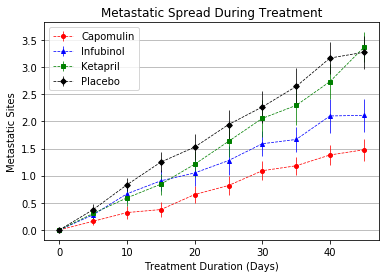

In [25]:
# Generate the Plot (with Error Bars)

#Flatten the pivoted dataframes
meta_site_df_pivot.reset_index()
meta_site_sem_df_pivot.reset_index()

#Filter data frame only on specific drugs of interest
meta_site_df_pivot_filtered = meta_site_df_pivot.loc[:,['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
meta_site_sem_df_pivot_filtered = meta_site_sem_df_pivot.loc[:,['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]

meta_site_df_pivot_filtered.reset_index()
meta_site_sem_df_pivot_filtered.reset_index()

#Traverse through the drugs dictionary
for k, v in drugs_decors_dict.items():
    plt.errorbar(meta_site_df_pivot_filtered.index, 
                meta_site_df_pivot_filtered[k],
                yerr=meta_site_sem_df_pivot_filtered[k],
                label=k,
                color=v[0], 
                marker=v[1],
                linestyle="dashed",
                linewidth=0.75,
                ms=4
                )

plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Metastatic Sites')
plt.title('Metastatic Spread During Treatment')
plt.legend(loc='best')
plt.grid(axis='y')


# Save the Figure
plt.savefig("analysis/2_metastatic_spread.png")
# Show the Figure
plt.show()

## Survival Rates

In [16]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_df = combined_df.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

# Convert to DataFrame
mice_df = mice_df.reset_index()

# Preview DataFrame
mice_df

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23
...,...,...,...
95,Zoniferol,25,16
96,Zoniferol,30,15
97,Zoniferol,35,14
98,Zoniferol,40,14


In [17]:
mice_df.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [18]:
# Minor Data Munging to Re-Format the Data Frames

mice_df_pivot = mice_df.pivot(index='Timepoint', columns='Drug', values='Mouse ID')

# Preview the Data Frame
mice_df_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [19]:
mice_df_pivot.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


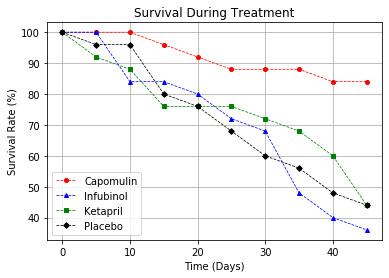

In [20]:
# Generate the Plot (Accounting for percentages)
mice_df_pivot.reset_index()

mice_df_pivot_filtered = mice_df_pivot.loc[:,['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']]
mice_df_pivot_filtered.head()

for k, v in drugs_decors_dict.items():
 plt.plot( (mice_df_pivot_filtered[k] / 25) * 100,
                label=k,
                color=v[0], 
                marker=v[1],
                linestyle="dashed",
                linewidth=0.75,
                ms=4)

plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate (%)')
plt.title('Survival During Treatment')
plt.legend(loc='best')
plt.grid()

# Save the Figure
plt.savefig("analysis/3_survival_rate.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [21]:
# Calculate the percent changes for each drug
summary_bar = tumor_volume_data_df_pivot
summary_bar = summary_bar.reset_index()
summary_bar_series = ((summary_bar.iloc[-1,1:]-summary_bar.iloc[0,1:])/summary_bar.iloc[0,1:])*100

# Display the data to confirm
summary_bar_series

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [22]:
#If needed, save the standard error, too
summary_bar_sem = tumor_volume_data_df_sem_pivot
summary_bar_sem = summary_bar_sem.reset_index()
summary_bar_sem_series = ((summary_bar_sem.iloc[-1,2:]-summary_bar_sem.iloc[0,2:])/summary_bar_sem.iloc[0,2:])*100

#We cannot calculate the delta percentage for the standard error as the initial sample is always zero

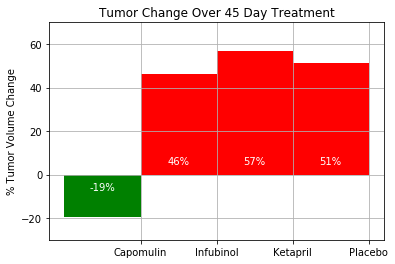

In [28]:
# Store all Relevant Percent Changes into a Tuple
drugs_of_interest = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']
percent_delta_total = tuple(summary_bar_series.loc[drugs_of_interest])

# Splice the data between passing and failing drugs
percent_delta_fail = tuple([x for x in percent_delta_total if x >= 0])
percent_delta_pass = tuple([x for x in percent_delta_total if x < 0])

# Orient widths. Add labels, tick marks, etc. 
ind = np.arange(len(percent_delta_total))
width = 1

#Start plotting
fig, ax = plt.subplots()

#Save to different rectangles depending on the values
pass_bar = ax.bar(np.arange(len(percent_delta_pass)), percent_delta_pass, width, color='g')
fail_bar = ax.bar(len(percent_delta_pass)+np.arange(len(percent_delta_fail)), percent_delta_fail, width, color='r')

#Set labels
ax.set_ylabel('% Tumor Volume Change')
ax.set_title('Tumor Change Over 45 Day Treatment')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(drugs_of_interest)
ax.set_ylim([-30,70])
ax.grid()
    
# Use functions to label the percentages of changes
def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        xloc = rect.get_x() + rect.get_width()/2.
        if height > 0:
            yloc = rect.get_y() + 6
        else:
            yloc = rect.get_y() - 6
            
        ax.text(xloc, yloc, f'{int(height)}%', ha='center', va='center', color='white')

# Call functions to implement the function calls
autolabel(pass_bar)
autolabel(fail_bar)

# Save the Figure
plt.savefig("analysis/4_tumor_change_bar.png")

# Show the Figure
fig.show()

## Analysis

1. From Figure 1, with regards to the Tumor Response to drugs, only the drug Capomulin showed a significant performance by inhibiting the tumor (by volume) throughout the treatment. The other drugs in case such as Infubinol and Ketapril shows no effect on tumor growth. 

2. From Figure 2, we can deduce that although there is an almost consistent upward trend among all drugs for the Metastatic Spread, Capomulin has the least amount of metastases. This metastatic spread is also related to Figure 3, Survival rate, whereas the two data points are indirectly proportional to each other. This can be explained by the fact that when the higher and wider the cancer cells metastasize (spreads from the primary cancerous tumor), the lower the chances of the mice' survival.

3. Finally, our bar graph that presents the drugs' overall performance in terms of the delta percentage on Tumor Volume further evidence that Capomulin has the only positive, passing rate on reducing the mice' tumor by volume. The other three drugs do not come close to the -19% delta change by Capomulin.
